# 1. Czym jest _Ablation study_ ?

Ablation study można interpretować jako testowanie poszczególnych części modelu. Przeprowadza się to, usuwając/dodając różne komponenty modelu lub zmieniając jego parametry. W ten sposób, wprowadzając delikatną zmianę, możemy zbadać jej wpływowość na model i zadecydować, czy należy ten komponent modyfikować, albo nawet całkowicie usunąć.

# 2. Biblioteki

In [40]:
%load_ext nb_black

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

<IPython.core.display.Javascript object>

# 3. Gotowy model na zbiorze MNIST

Skorzystałem z gotowej implementacji modelu dające bardzo dobre wyniki na zbiorze MNIST.  
Źródło: https://keras.io/examples/vision/mnist_convnet/

## 3.1. Procesowanie danych

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 18s 2us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 3.2. Budowanie modelu

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## 3.3. Trenowanie

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 25s 57ms/step - loss: 0.7743 - accuracy: 0.7560 - val_loss: 0.0806 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 24s 57ms/step - loss: 0.1226 - accuracy: 0.9624 - val_loss: 0.0594 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0846 - accuracy: 0.9735 - val_loss: 0.0466 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 23s 55ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0360 - val_accuracy: 0.9917
Epoch 7/15
422/422 [==============================] - 23s 55ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.0318 - val_accuracy:

## 3.4. Ewaluacja

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024958884343504906
Test accuracy: 0.9915000200271606


# ======= Tu zaczyna się moja praca =======

# 4. Funkcje pomocnicze

In [47]:
def plotResults(infos, labels, colors):
    plt.figure(figsize=(20, 10))

    for info, lab, col in zip(infos, labels, colors):
        table = pd.DataFrame.from_dict(info.history)
        table.reset_index(inplace=True)
        plt.plot(
            table["index"],
            table["accuracy"],
            "-ok",
            color=col[0],
            label=lab + " train accuracy",
        )
        plt.plot(
            table["index"],
            table["val_accuracy"],
            "-ok",
            color=col[1],
            label=lab + " valid accuracy",
        )
    plt.grid(alpha=0.2)
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(prop={"size": 20})
    plt.show()

<IPython.core.display.Javascript object>

In [48]:
def trainModel(model, batchSize=128, epochs=15, optimizer="adam"):
    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )
    info = model.fit(
        x_train,
        y_train,
        batch_size=batchSize,
        epochs=epochs,
        validation_split=0.1,
        verbose=0,
    )
    return info

<IPython.core.display.Javascript object>

# 5. Eksperymenty

## 5.1 Usunięcie/dodanie warstwy

In [22]:
modelStandard = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

modelAdded = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

modelRemoved = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [24]:
infoStandard = trainModel(modelStandard)
infoAdded = trainModel(modelAdded)
infoRemoved = trainModel(modelRemoved)

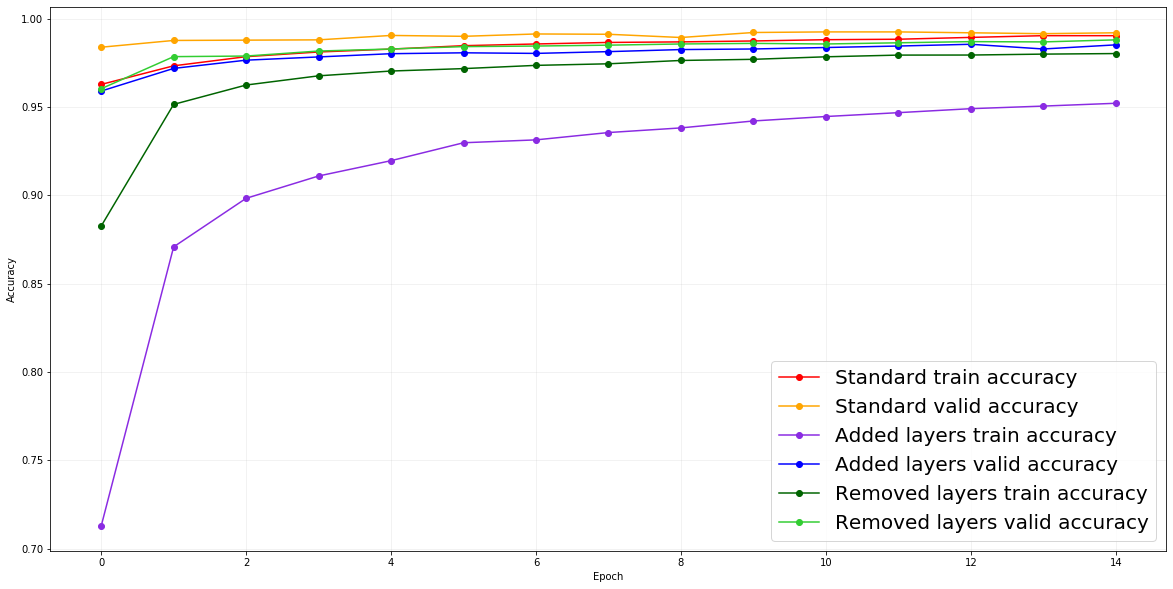

<IPython.core.display.Javascript object>

In [49]:
plotResults(
    [infoStandard, infoAdded, infoRemoved],
    ["Standard", "Added layers", "Removed layers"],
    [("red", "orange"), ("blueviolet", "blue"), ("darkgreen", "limegreen")],
)

Ewidentnie model bazowy trafił dość blisko optimum. Najbardziej odstający okazał się model z warstwą więcej. Co ciekawe modele otrzymywały lepsze rezultaty na zbiorze walidacyjnym niż na treningowym. Prawdopodobnie pod spodem stosowany jest jakiś sprawny mechanizm regularyzacji wag.

# 6. Zmiana argumentów warstw

## 6.1. Dropout

In [33]:
modelHigherDropout = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.9),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

modelLowerDropout = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [34]:
infoHigherDropout = trainModel(modelHigherDropout)
infoLowerDropout = trainModel(modelLowerDropout)

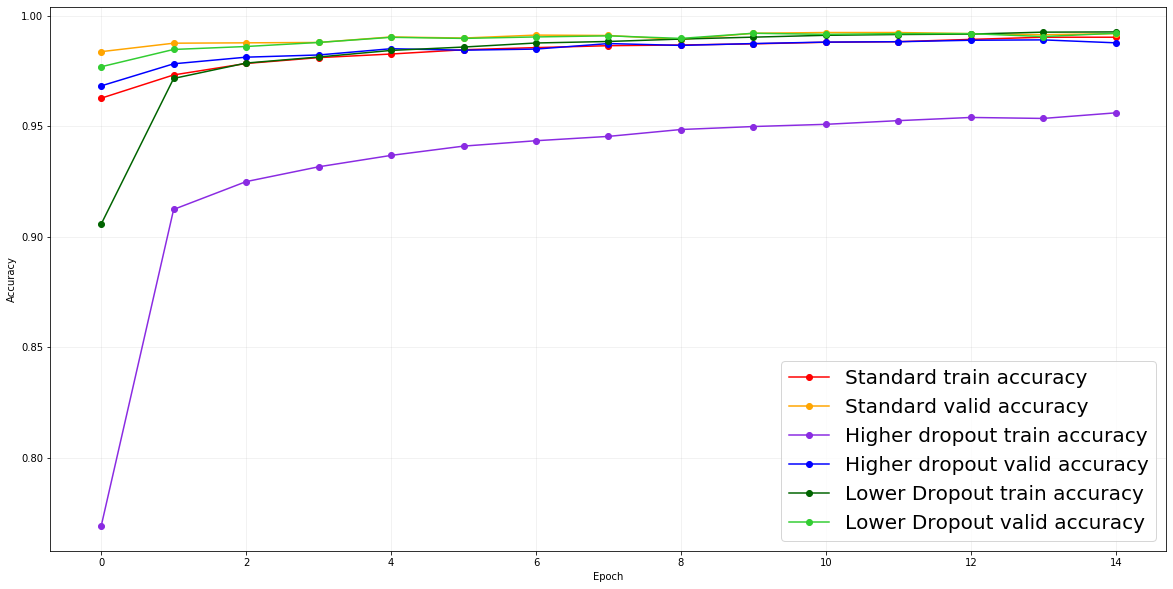

<IPython.core.display.Javascript object>

In [50]:
plotResults(
    [infoStandard, infoHigherDropout, infoLowerDropout],
    ["Standard", "Higher dropout", "Lower Dropout"],
    [("red", "orange"), ("blueviolet", "blue"), ("darkgreen", "limegreen")],
)

Można wyciągnąć podobne wnioski co poprzednio. Znów zmiany w modelu go jedynie pogorszyły.

## 6.2. Funkcja aktywacji na warstwie wyjściowej

In [35]:
modelSigmoidOut = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [36]:
infoSigmoidOut = trainModel(modelSigmoidOut)

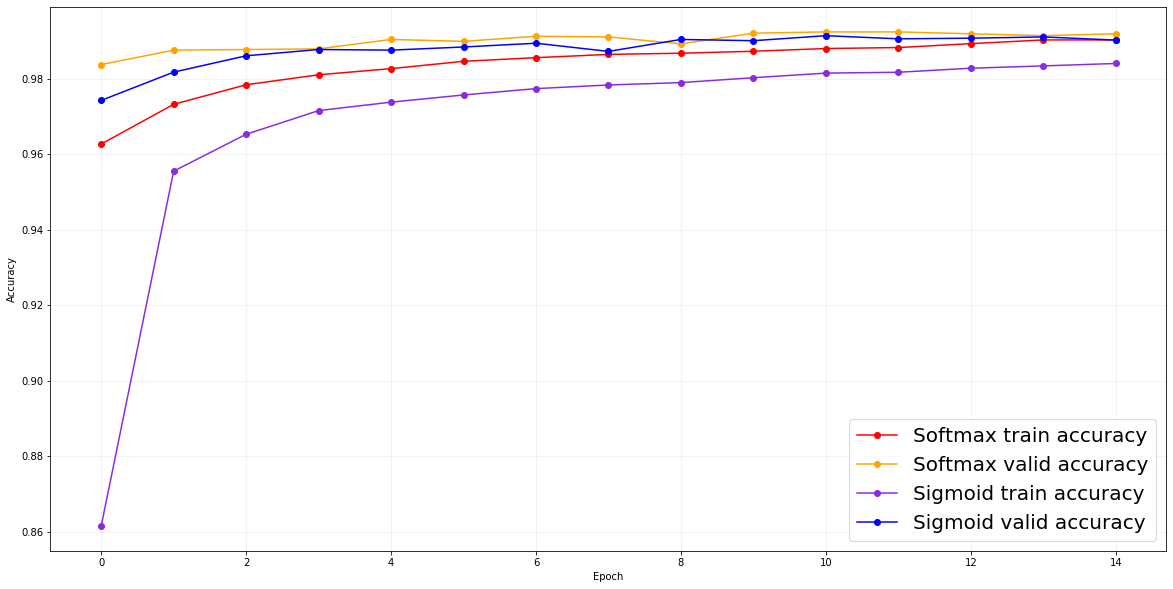

<IPython.core.display.Javascript object>

In [51]:
plotResults(
    [infoStandard, infoSigmoidOut],
    ["Softmax", "Sigmoid"],
    [("red", "orange"), ("blueviolet", "blue")],
)

Tu bez zaskoczenia _softmax_ okazał się lepszy. Podobne testy przeprowadzałem na innym przedmiocie. Okazuje się, że funkcja _softmax_ zawsze wygrywa, ze względu na sumowanie się prawdopodobieństw do 1.

## 6.3. Funkcje aktywacji na warstwach ukrytych

In [37]:
modelSigmoid = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTanh = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [38]:
infoSigmoid = trainModel(modelSigmoid)
infoTanh = trainModel(modelTanh)

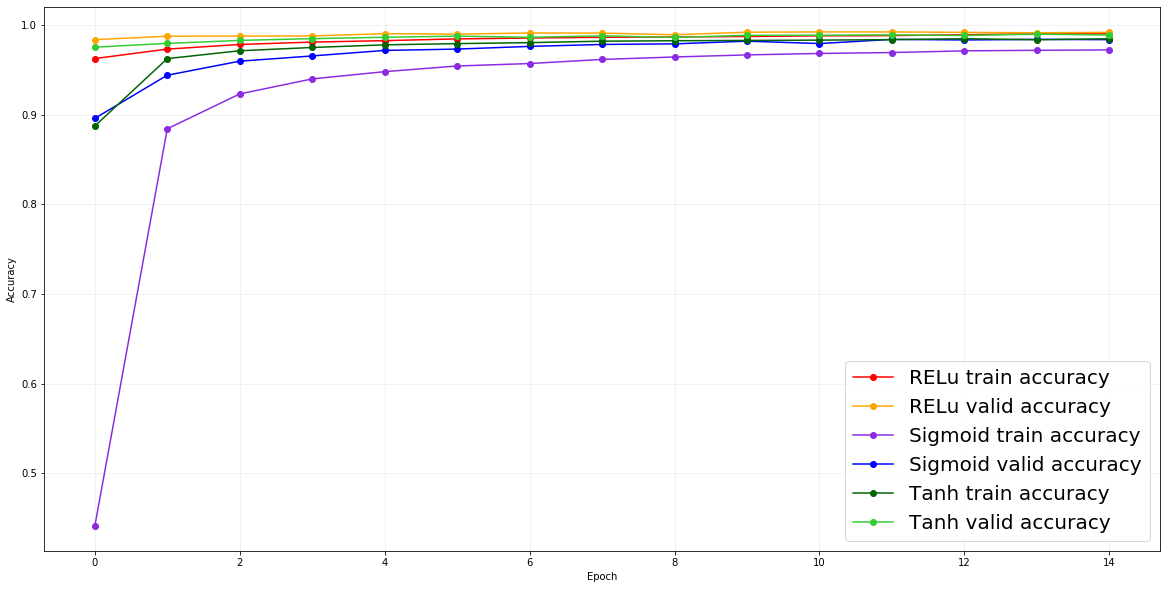

<IPython.core.display.Javascript object>

In [52]:
plotResults(
    [infoStandard, infoSigmoid, infoTanh],
    ["RELu", "Sigmoid", "Tanh"],
    [("red", "orange"), ("blueviolet", "blue"), ("darkgreen", "limegreen")],
)

# 7. Zmiana argumentów treningu - inne optimizery

In [39]:
infoAdadelta = trainModel(modelStandard, optimizer = "Adadelta")
infoAdagrad = trainModel(modelStandard, optimizer = "Adagrad")

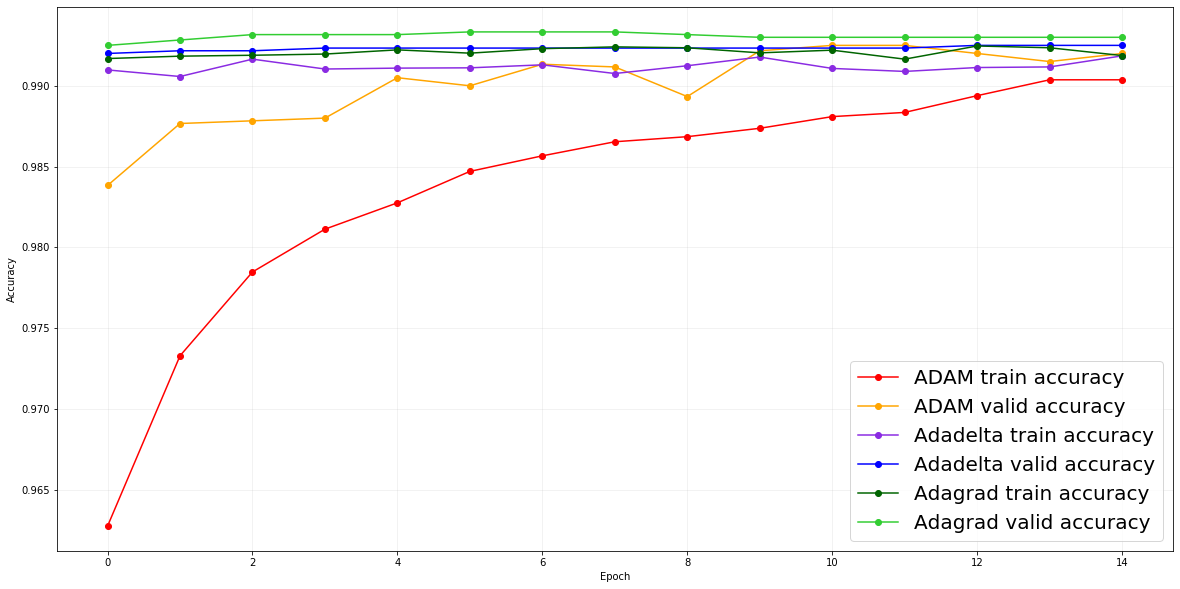

<IPython.core.display.Javascript object>

In [53]:
plotResults(
    [infoStandard, infoAdadelta, infoAdagrad],
    ["ADAM", "Adadelta", "Adagrad"],
    [("red", "orange"), ("blueviolet", "blue"), ("darkgreen", "limegreen")],
)

W końcu coś się udało! Optimizery _Adadelta_ oraz _Adagrad_ zadziałały o wiele lepiej niż _ADAM_ :)

# 8. Podsumowanie

Ciężko mi tutaj o jakieś dobre podsumowanie tematu. Zdecydowanie zabiegi typu _Ablation_ są wartościowe i mogą polepszyć nam model. Moja wiedza na temat niskopoziomowego działania sieci (zwłaszcza konwolucyjnych), jest jeszcze jednak zbyt mała żeby rozumieć co tutaj zaszło :(